# 統計学

## 1次元正規分布

In [1]:
import numpy as np

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x- mu)**2 / (2 * sigma ** 2))
    return y

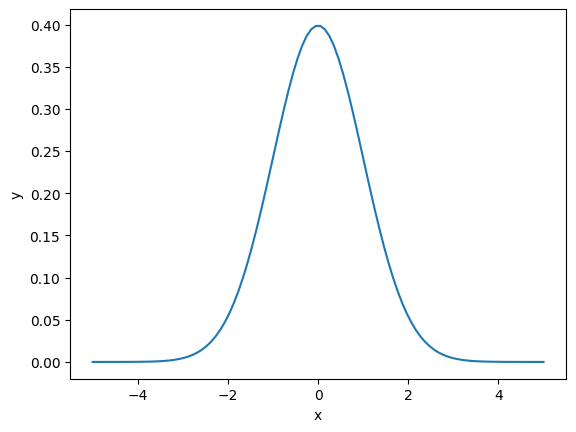

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(-5, 5, 100)
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

平均による分布形状の変化

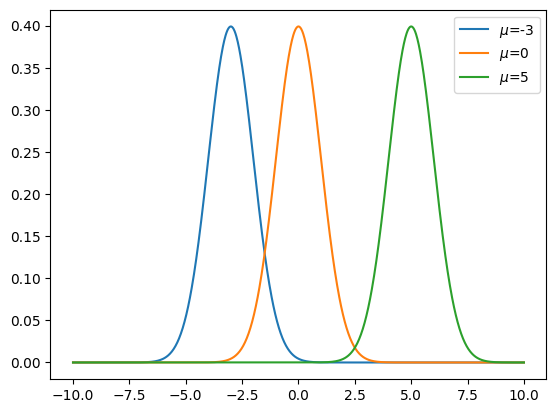

In [7]:
x = np.linspace(-10, 10, 1000)

y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label='$\mu$=-3')
plt.plot(x, y1, label='$\mu$=0')
plt.plot(x, y2, label='$\mu$=5')
plt.legend()
plt.show()


分散による分布形状の変化

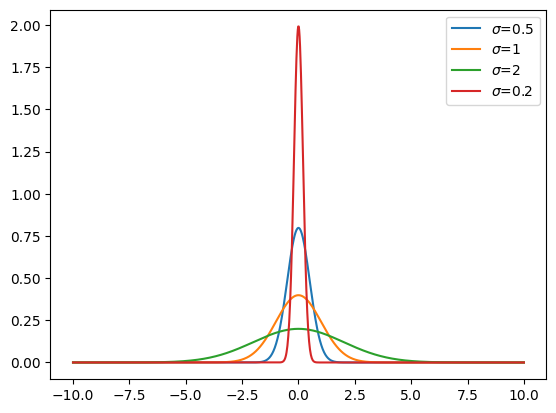

In [12]:
y3 = normal(x, mu=0, sigma=0.5)
y4 = normal(x, mu=0, sigma=1)
y5 = normal(x, mu=0, sigma=2)
y6 = normal(x, mu=0, sigma=0.2)

plt.plot(x, y3, label='$\sigma$=0.5')
plt.plot(x, y4, label='$\sigma$=1')
plt.plot(x, y5, label='$\sigma$=2')
plt.plot(x, y6, label='$\sigma$=0.2')
plt.legend()
plt.show()

### 中心極限定理
+ どんな確率分布からでも標本集合から平均μ_iと分散σ_iを求めて各々の平均を取ると下記パラメータを持つ正規分布になる
+ 平均: μ
+ 分散: σ^2/N

中心極限定理の実験

In [13]:
import numpy as np

N = 3 # サンプルサイズ
xs = []
for n in range(N):
    x = np.random.rand() # 一様分布からの乱数
    xs.append(x)
x_mean = np.mean(xs)
print(x_mean)

0.9460021831584154


In [24]:
import numpy as np
from matplotlib import pyplot as plt

def central_limit_theorem_from_uniform(N):
    x_means = []
    x_vars = []

    for _ in range(10000):
        xs = []
        for n in range(N): # サンプルサイズ
            x = np.random.rand() # 一様分布からのサンプル
            xs.append(x)
        mean = np.mean(xs)
        var = np.var(xs)
        x_means.append(mean)
        x_vars.append(var)

    fig = plt.figure()

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.hist(x_means, bins='auto', density=True)
    ax1.set_title(f"Mean with N={N}")
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability Density')
    ax1.set_xlim(-0.5, 1.05)
    ax1.set_ylim(0, 5)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.hist(x_vars, bins='auto', density=True)
    ax2.set_title(f"Variance with N={N}")
    ax2.set_xlabel('x')
    ax2.set_ylabel('Probability Density')
    ax2.set_xlim(-0.5, 1.05)
    ax2.set_ylim(0, 5)

    fig.tight_layout()
    fig.show()

/var/folders/nl/wxlnx56d2yq3s_0s1lw1g2t00000gn/T/ipykernel_3959/3341807862.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


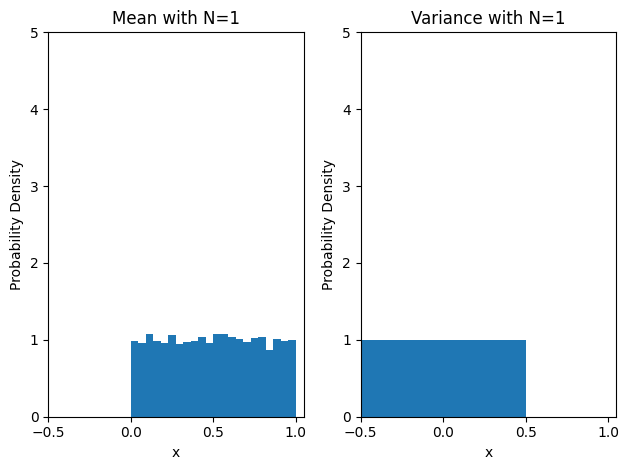

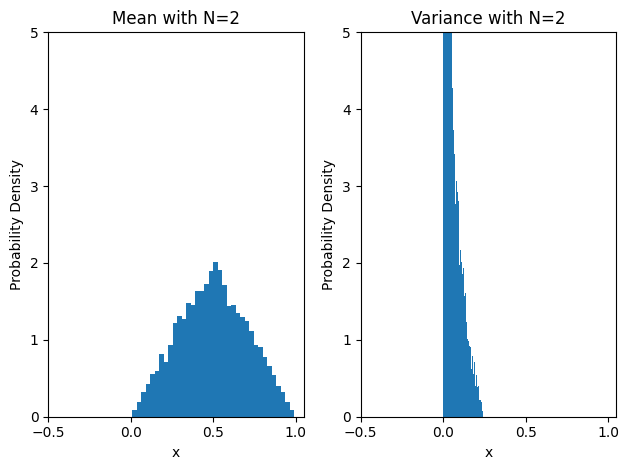

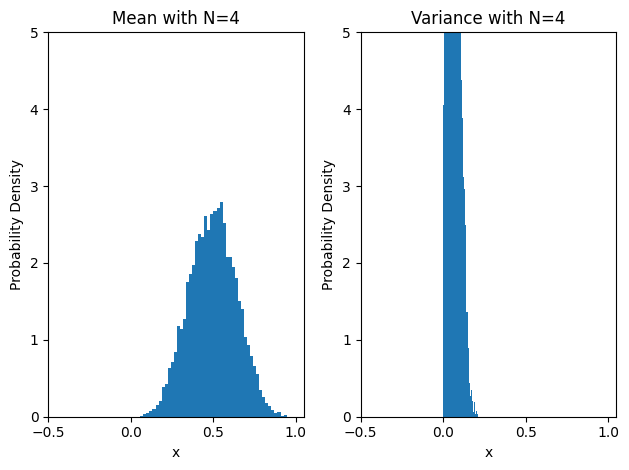

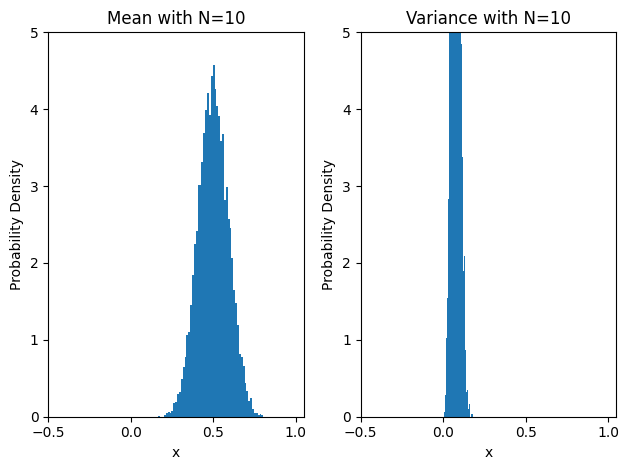

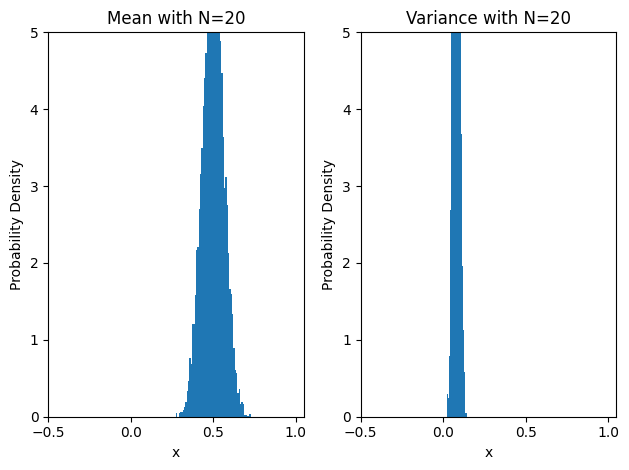

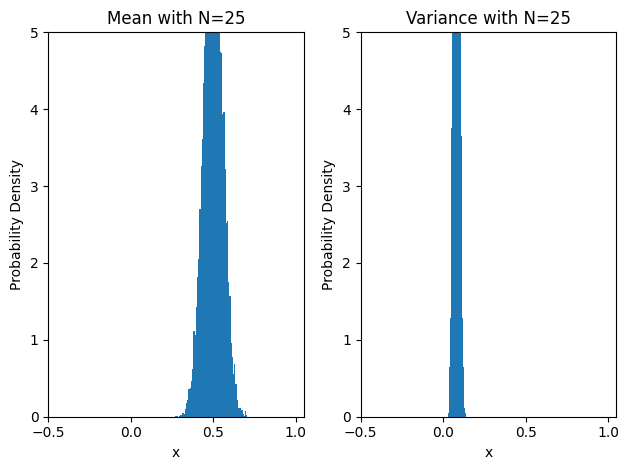

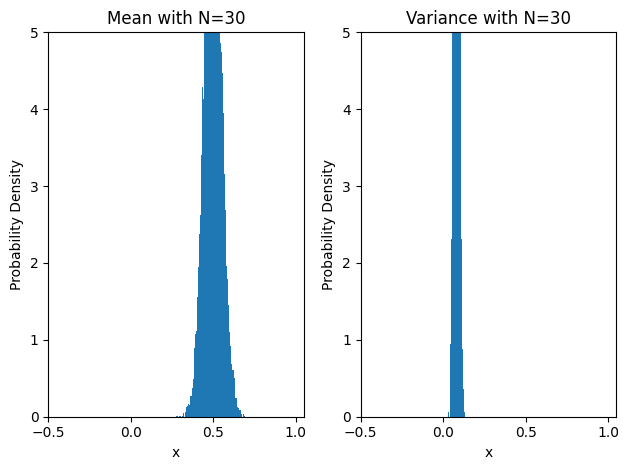

In [25]:
central_limit_theorem_from_uniform(N=1)
central_limit_theorem_from_uniform(N=2)
central_limit_theorem_from_uniform(N=4)
central_limit_theorem_from_uniform(N=10)
central_limit_theorem_from_uniform(N=20)
central_limit_theorem_from_uniform(N=25)
central_limit_theorem_from_uniform(N=30)
# central_limit_theorem_from_uniform(N=50)
# central_limit_theorem_from_uniform(N=100)


サンプル和の期待値と分散
+ 確率分布p(x)の平均μ, 分散σ^2の場合
+ サンプル和の平均Nμ
+ サンプル和の分散Nσ^2

In [32]:
import numpy as np
from matplotlib import pyplot as plt

# サンプル和の和
def sum_of_sampling_sum_from_uniform(N):
    x_sums = []
    for _ in range(10000):
        xs = []
        for n in range(N):
            x = np.random.rand() # 一様分布([0,1]の平均1/2, 分散1/12)
            xs.append(x)
        t = np.sum(xs) # 和
        x_sums.append(t)
    
    def normal(x, mu=0, sigma=1):
        y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
        return y
    
    x_norm = np.linspace(-5, 5, 1000)
    mu = N / 2 # 1/2
    sigma = np.sqrt(N/12) # 1/12
    y_norm = normal(x_norm, mu, sigma)

    # グラフ
    plt.hist(x_sums, bins='auto', density=True)
    plt.plot(x_norm, y_norm)
    plt.title(f"N={N}")
    plt.xlim(-10,6) # x軸の範囲を-1から6の間に設定
    plt.show()


### サンプル和の分布は正規分布

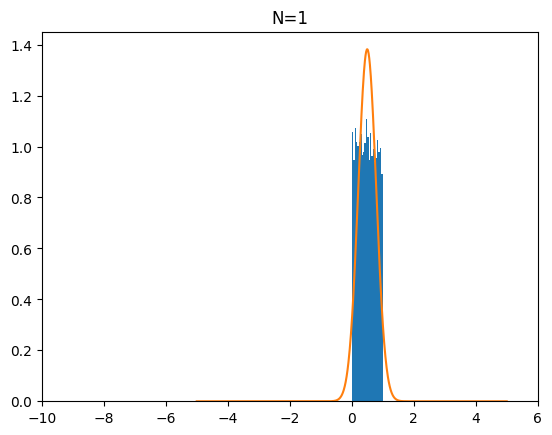

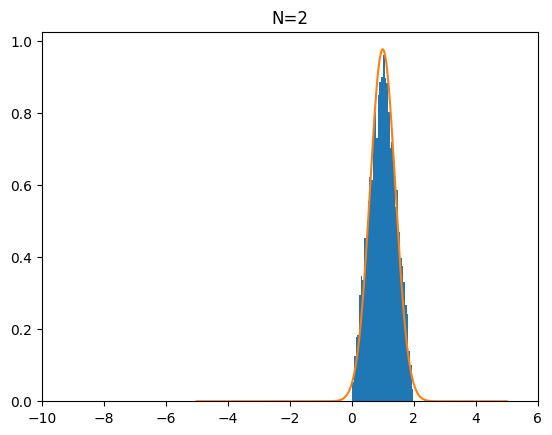

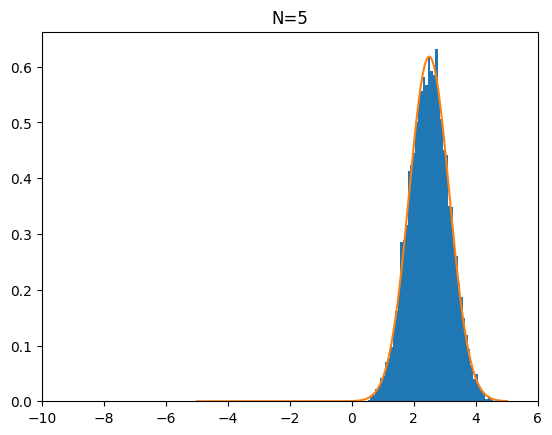

In [33]:
sum_of_sampling_sum_from_uniform(N=1)
sum_of_sampling_sum_from_uniform(N=2)
sum_of_sampling_sum_from_uniform(N=5)
# sum_of_sampling_sum_from_uniform(N=10)
# sum_of_sampling_sum_from_uniform(N=20)
# sum_of_sampling_sum_from_uniform(N=50)
